# Análise de Opiniões sobre Livros com Python

## Etapa 1 - Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy as sp
import matplotlib.pyplot as plt
import tensorflow as tf

import string
import random
import re
import math

from bs4 import BeautifulSoup

from tensorflow.keras import layers
import tensorflow_datasets as tfds

2023-11-21 05:12:45.420593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 05:12:45.707631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 05:12:45.707665: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 05:12:45.709206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 05:12:45.870198: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 05:12:45.872221: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
tf.__version__

'2.14.0'

## Etapa 2 - Pré-processamento dos dados

### Carregamento dos dados

In [3]:
import pandas as pd

caminho_do_arquivo = './train/utlc_movies.csv'
cols = ["review_text_tokenized", "polarity"]
train_data  = pd.read_csv(caminho_do_arquivo)


In [4]:
train_data.drop(['original_index', 'review_text', 
       'review_text_tokenized', 'rating', 'kfold_polarity',
       'kfold_rating'], axis=1, inplace=True)

In [5]:
train_data.fillna(0, inplace=True)

In [6]:
train_data.polarity.unique()

array([1., 0.])

<Axes: xlabel='polarity', ylabel='count'>

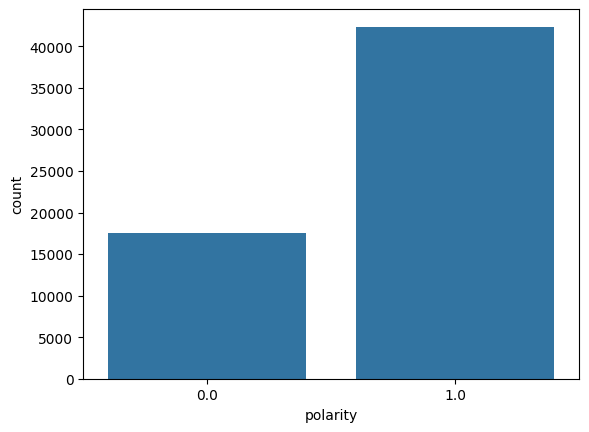

In [7]:
sns.countplot(train_data, x="polarity")

In [8]:
train_data["polarity"].value_counts()

polarity
1.0    42356
0.0    17527
Name: count, dtype: int64

### Limpeza dos dados

In [9]:
data = train_data
data.columns

Index(['review_text_processed', 'polarity'], dtype='object')

In [10]:
X = data.iloc[1:, 0].values
X

array(['o filme e realmente diferente e bem lento mas nao de uma forma ruim ou entediante, e muito interessante e chama atencao desde o inicio nos mantendo atentos ate o final. a atuacao da amy adams e muito boa e aqui onde ela realmente merecia uma indicacao ao oscar infelizmente foi esnobada, jeremy renner tambem esta otimo como sempre. fotografia muito boa e todas as tecnicas de som sao perfeitas, mereceu o oscar por melhor edicao de som porque e simplesmente perfeito o trabalho que fizeram com o som deste filme, quando os aliens se comunicam com a louise e fascinante. na minha opiniao nao e um filme convencional sobre ataque alienigena, e muito mais profundo que isso focando muito no drama, nao espere acao de "a chegada" porque definitivamente nao e um filme ao estilo "guerra dos mundos" e "independence day" (apesar de eu gostar de ambos os filmes citados), e realmente um drama psicologico bem intenso que nos mostra como a mente humana e limitada achando que tudo aquilo que e desco

In [11]:
X.shape

(59882,)

In [12]:
type(X)

numpy.ndarray

In [13]:
y = data.iloc[1:, 1].values
y.shape

(59882,)

In [14]:
from sklearn.model_selection import train_test_split

X, _, y,_ = train_test_split(X, y, test_size = 0.85, stratify = y)   

In [15]:
y.shape, X.shape

((8982,), (8982,))

In [16]:
unique, counts = np.unique(y, return_counts=True)
unique, counts 

(array([0., 1.]), array([2629, 6353]))

In [17]:
def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, 'lxml').get_text()
    
    tweet = re.sub(r'@', ' ', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', tweet)
    tweet = re.sub(r'\d+', ' ', tweet)
    tweet = tweet.replace("htt", "").replace("\n", "")
    tweet = re.sub(r' +', ' ', tweet)
    
    return tweet

In [18]:
text = data.iloc[2500, 0]
text

'agora posso falar: chega dia 26! chega! *---------*'

In [19]:
text = clean_tweet(text)
text

'agora posso falar: chega dia ! chega! *---------*'

In [20]:
# Retirando stopwords

nlp = sp.load("pt_core_news_sm")
nlp

In [21]:
stop_words = sp.lang.pt.STOP_WORDS
print(stop_words)
len(stop_words)

{'nós', 'vêm', 'lado', 'inicio', 'cuja', 'outros', 'ele', 'cento', 'qualquer', 'demais', 'bom', 'nessa', 'parte', 'números', 'estivemos', 'isto', 'vossa', 'longe', 'somos', 'breve', 'o', 'tarde', 'sobre', 'pouco', 'no', 'sexta', 'maior', 'comprido', 'ambas', 'nossa', 'tente', 'fazer', 'tanta', 'nesse', 'naquele', 'vocês', 'quem', 'menos', 'quarto', 'máximo', 'quê', 'mil', 'temos', 'adeus', 'podem', 'tais', 'dez', 'se', 'com', 'veja', 'antes', 'sete', 'são', 'ainda', 'fora', 'uma', 'têm', 'novos', 'favor', 'mesmo', 'porquê', 'estou', 'inclusive', 'sob', 'primeiro', 'usar', 'nove', 'ademais', 'eu', 'certeza', 'através', 'depois', 'nas', 'muito', 'dezasseis', 'lá', 'além', 'sim', 'faço', 'debaixo', 'nossas', 'grandes', 'vezes', 'deste', 'foste', 'tiveram', 'aí', 'ligado', 'cujo', 'estiveste', 'naquela', 'fazemos', 'te', 'vens', 'próprio', 'tanto', 'dão', 'vosso', 'elas', 'tal', 'contudo', 'neste', 'onde', 'está', 'questão', 'quarta', 'vai', 'alguns', 'até', 'disso', 'pegar', 'obrigado', '

416

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def clean_tweet2(tweet):
    tweet = tweet.lower()
    document = nlp(tweet)
    
    words = []
    for token in document:
        words.append(token.text)
    
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    words = ' '.join([str(element) for element in words])
    return words

In [24]:
text2 = clean_tweet2(text)
text2

'falar chega dia chega ---------'

In [25]:
# Aplicando em tudo
data_clean = [clean_tweet2(clean_tweet(tweet)) for tweet in X]
data_clean


/tmp/ipykernel_747/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
/tmp/ipykernel_747/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


['luzes apagam ate entrega bons sustos diverte aparicoes sobrenaturais diana porem simplicidade excessiva roteiro incomoda impede filme sair comum feito',
 'daqui poco aparece michael caine elenco',
 'tinha assistido nenhum filme halloween filme interessante diferente hora pesadelo sexta-feira esperava filme muita morte sangue surpreendi completamente diferente pensei filme tratava classico gosta genero confesso resolvi assistir filme franquia falada causa filme vou esperar remake espero seja tao nao filmao fodao nao vou pagar cult filme agradou assistir',
 'totalmente nonsense ... almodovar',
 'filme peca execucao roteiro curiosamente cenarios ruins figurinos ruins angulos cameras qualidade duvidosa principalmente efeitos especiais pessima qualidade',
 'stephen king melhor fiquei perturbada recomendo',
 'obra-prima fascinante so comprovar total genialidade nolan filme entrara hall mim melhor retratacao espaco ja feita aonde nenhum outro cineasta jamais trata dimensoes filme tremendame

In [26]:
data_labels = y
data_labels

array([0., 1., 0., ..., 1., 0., 0.])

In [27]:
np.unique(data_labels)

array([0., 1.])

### Tokenização

In [28]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size = 2**16)

In [29]:
2**16 # Vocabulario

65536

In [30]:
tokenizer.vocab_size

26391

In [31]:
print(tokenizer.subwords)

['filme_', 'nao_', 'pra_', ' ... ', 'historia_', 'so_', 'filmes_', 'ja_', 'melhor_', 'sao_', 'ate_', 'filme', 'tao_', 'achei_', 'roteiro_', 'vida_', 'trilha_', 'cenas_', 'tambem_', 'cinema_', 'voce_', 'gostei_', 'personagens_', 'assistir_', 'cena_', 'sonora_', 'acho_', ' ...', 'atuacao_', 'personagem_', 'vi_', 'atuacoes_', 'realmente_', 'otimo_', 'melhores_', 'pessoas_', 'mundo_', 'fotografia_', 'incrivel_', 'vale_', 'livro_', ' .. ', 'apesar_', 'lindo_', 'q_', 'excelente_', 'pena_', 'acao_', 'cara_', 'anos_', 'obra_', 'alem_', 'coisas_', 'amor_', 'fiquei_', 'porem_', 'mim_', 'efeitos_', 'seja_', 'tinha_', 'interessante_', 'direcao_', 'assisti_', 'ha_', 'momentos_', 'gente_', 'dele_', 'simplesmente_', 'diretor_', 'elenco_', 'quase_', 'otima_', 'la_', 'poderia_', 'super_', 'oscar_', 'outro_', 'principalmente_', 'atores_', 'muita_', 'hoje_', 'estao_', 'sendo_', 'ficou_', 'consegue_', 'fato_', 'trama_', 'diferente_', 'se_', 'perfeito_', 'simples_', 'deixa_', 'legal_', 'ai_', 'entao_', 'al

In [32]:
# Cada plavara terá um enconding para passar ao algoritmos
ids = tokenizer.encode("eu amo este livro")
ids

[810, 176, 7492, 525]

In [33]:
text = tokenizer.decode(ids)
text

'eu amo este livro'

In [34]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]
data_inputs

[[2691,
  25104,
  11,
  567,
  157,
  1718,
  2073,
  2557,
  13812,
  7662,
  56,
  1036,
  3494,
  15,
  1633,
  5639,
  1,
  540,
  534,
  840],
 [2797, 5333, 789, 394, 11569, 1160],
 [60,
  493,
  199,
  1,
  5683,
  1,
  61,
  88,
  200,
  2646,
  8764,
  26180,
  5747,
  101,
  1,
  80,
  210,
  589,
  750,
  338,
  88,
  401,
  1,
  2137,
  139,
  311,
  166,
  337,
  1191,
  24,
  1,
  319,
  20257,
  290,
  1,
  119,
  566,
  1038,
  329,
  59,
  13,
  2,
  565,
  4694,
  2,
  119,
  6799,
  1562,
  1,
  1576,
  235],
 [158, 16621, 4, 8127],
 [1,
  828,
  1920,
  15,
  22532,
  975,
  1188,
  1445,
  1188,
  4212,
  2537,
  260,
  21426,
  78,
  58,
  198,
  1874,
  3810],
 [1181, 1090, 9, 55, 6741, 218],
 [340,
  26180,
  261,
  1548,
  6,
  7828,
  823,
  1154,
  599,
  1,
  20979,
  3978,
  57,
  9,
  14577,
  481,
  8,
  530,
  1960,
  199,
  77,
  1467,
  1364,
  487,
  5888,
  1,
  12873,
  651,
  1205,
  3449,
  4243,
  2802,
  17,
  244,
  461,
  739,
  291,
  1,
  41

### Padding

In [35]:
# Preenchimento das sentenças, deixando tudo do mesmo tamanho
max_len = max(len(sentence) for sentence in data_inputs)
max_len

904

In [36]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    data_inputs,
    value = 0,
    padding = 'post',
    maxlen=max_len
)
data_inputs

array([[ 2691, 25104,    11, ...,     0,     0,     0],
       [ 2797,  5333,   789, ...,     0,     0,     0],
       [   60,   493,   199, ...,     0,     0,     0],
       ...,
       [17721,     0,     0, ...,     0,     0,     0],
       [  911,     6,  1044, ...,     0,     0,     0],
       [   15,    58,  1795, ...,     0,     0,     0]], dtype=int32)

### Divisão da base de dados em treinamento e teste

In [37]:
train_inputs, test_inputs, trains_labels, test_labels = train_test_split(
    data_inputs,
    data_labels,
    test_size=0.1,
    stratify = data_labels
)

In [38]:
train_inputs[0]

array([17126,  1987,   720,     2,  5338,   325,    80,    25,   131,
        6036,    19,    90,  1354,  1444,   150, 23594,  3324,     8,
       11427,    25, 23820,   273,    25,  1512,   227,  3039,   823,
        2075,   239,   408,  6288,   531,    33, 22993, 25506,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [39]:
train_inputs.shape

(8083, 904)

In [40]:
trains_labels.shape

(8083,)

In [41]:
test_inputs.shape

(899, 904)

In [42]:
test_labels.shape

(899,)

In [43]:
len(set(trains_labels))

2

## Construção do Modelo

In [44]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output
        

In [45]:
tokenizer.vocab_size

26391

## Treinamento

In [46]:
vocab_size = tokenizer.vocab_size
vocab_size

26391

In [47]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
nb_classes = len(set(trains_labels))
dropout_rate = 0.2
nb_epochs = 10
batch_size = 64

In [48]:
Dcnn = DCNN(
    vocab_size=vocab_size, 
    emb_dim=emb_dim, 
    nb_filters=nb_filters, 
    ffn_units=ffn_units, 
    nb_classes=nb_classes, 
    dropout_rate=dropout_rate)

In [49]:
if nb_classes == 2:
    print("Duas Classes")
    Dcnn.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

Duas Classes


In [50]:
checkpoint_path = "./"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint  restored')

Latest checkpoint  restored


In [51]:
history = Dcnn.fit(
    train_inputs, 
    trains_labels, 
    batch_size=batch_size,
    epochs=nb_epochs, 
    verbose=1, 
    validation_split=0.10
)

ckpt_manager.save()

Epoch 1/10


2023-11-21 05:14:34.666094: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26302784 exceeds 10% of free system memory.
2023-11-21 05:14:34.934403: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21309600 exceeds 10% of free system memory.


2023-11-21 05:14:35.344089: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21112800 exceeds 10% of free system memory.
2023-11-21 05:14:35.349771: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21309600 exceeds 10% of free system memory.
2023-11-21 05:14:35.404006: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21112800 exceeds 10% of free system memory.
2023-11-21 05:14:37.420960: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at resource_variable_ops.cc:597 : INVALID_ARGUMENT: Cannot update variable with shape [26637,200] using a Tensor with shape [26391,200], shapes must be equal.


InvalidArgumentError: Graph execution error:

Detected at node Adam/AssignSubVariableOp defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/daniel/.pyenv/versions/3.11.2/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/daniel/.pyenv/versions/3.11.2/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/daniel/.pyenv/versions/3.11.2/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_747/2958067468.py", line 1, in <module>

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 241, in _update_step

  File "/home/daniel/projects/sanpon-machine-learn-data-analysis/venv/lib/python3.11/site-packages/keras/src/optimizers/adam.py", line 195, in update_step

Cannot update variable with shape [26637,200] using a Tensor with shape [26391,200], shapes must be equal.
	 [[{{node Adam/AssignSubVariableOp}}]] [Op:__inference_train_function_1915]

: 

## Avaliação

In [ ]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

15/15 [==============================] - 2s 132ms/step - loss: 1.0050 - accuracy: 0.7219
[1.0050004720687866, 0.72191321849823]


In [ ]:
y_pred_test = Dcnn.predict(test_inputs)

29/29 [==============================] - 2s 68ms/step


In [ ]:
y_pred_test

array([[4.73742327e-03],
       [9.85764802e-01],
       [3.18646312e-01],
       [1.28362086e-02],
       [2.46626027e-02],
       [1.00000000e+00],
       [1.24542020e-01],
       [9.81674314e-01],
       [9.99922335e-01],
       [3.34311277e-01],
       [6.86677933e-01],
       [8.30815017e-01],
       [9.77984846e-01],
       [5.73871613e-01],
       [9.92856443e-01],
       [9.99297917e-01],
       [2.53001541e-01],
       [9.05761182e-01],
       [9.98574317e-01],
       [8.13280120e-02],
       [2.37417802e-01],
       [7.10040808e-01],
       [2.06892714e-01],
       [9.99848902e-01],
       [7.07583308e-01],
       [7.71683514e-01],
       [9.98638690e-01],
       [9.64093983e-01],
       [9.67953026e-01],
       [9.99717593e-01],
       [9.74732757e-01],
       [9.57881570e-01],
       [9.91997361e-01],
       [8.15392792e-01],
       [9.68713105e-01],
       [9.99041021e-01],
       [9.99861896e-01],
       [9.99990642e-01],
       [7.75530875e-01],
       [9.74633217e-01],


In [ ]:
y_pred_test = (y_pred_test > 0.5)

In [ ]:
y_pred_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
test_labels

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[263,   0],
       [636,   0]])

<Axes: >

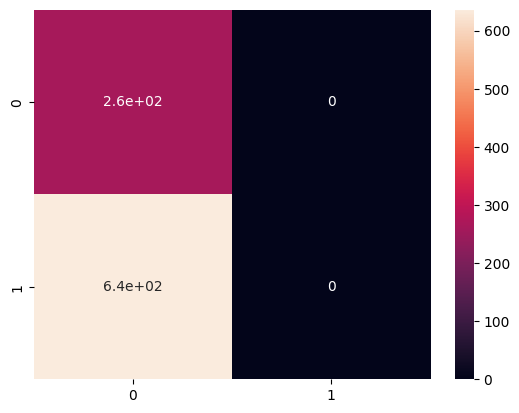

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

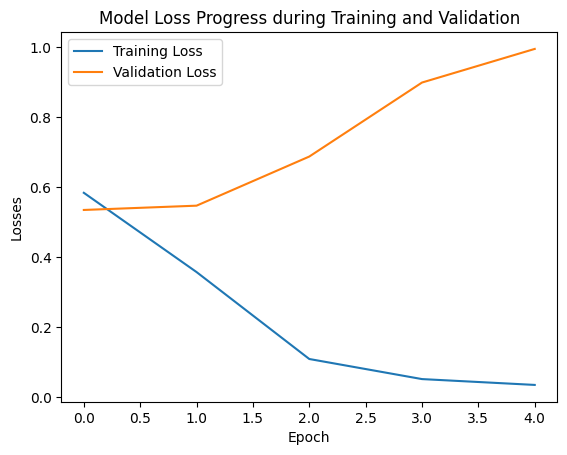

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss Progress during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training Loss', 'Validation Loss'])

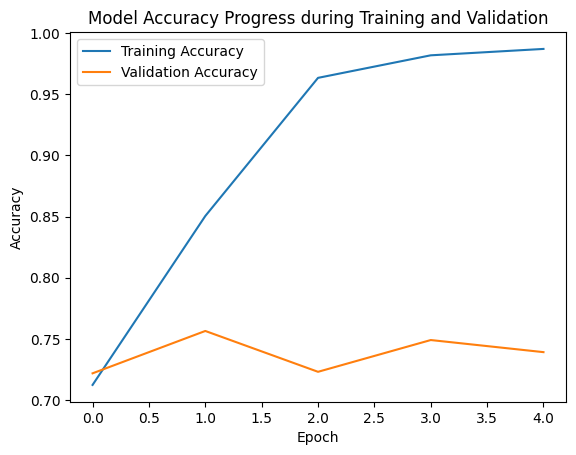

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy Progress during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

## Previsões

In [ ]:
text = """uma bosta, uma merda"""

text = clean_tweet2(clean_tweet(text))


text = tokenizer.encode(text)
text

[1837, 2725]

In [ ]:
prev = Dcnn(np.array([text]), training=False).numpy()


print(prev)
print(np.argmax(prev, axis=1))
print(np.argmin(prev, axis=1))



[[0.0051251]]
[0]
[0]


In [ ]:
weights_save_path = './model'
Dcnn.save_weights(weights_save_path)

In [ ]:
weights_path = './model'
Dcnn.load_weights(weights_path)

In [ ]:
model_save_path = './model'
Dcnn.save(model_save_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(Dcnn)
tflite_model = converter.convert()
tflite_save_path = './model/modelo.tflite'
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_model)

print("Modelo treinado exportado com sucesso!")